# Análise por sexo

Importando o dataframe de vacinação em Recife-PE 

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('vacinados.csv',sep=';',encoding ='UTF-8',header = 0)
data


,cpf,nome,sexo,grupo,vacina,lote,dose,data_vacinacao,local_vacinacao
0,***.574.544-**,AABAN VASCONCELOS ZYZZYAG,MASCULINO,TRABALHADORES INDUSTRIAIS E BANCÁRIOS,2 - CHADOX1NCOV-19 - OXFORD/ASTRAZENECA (FIOCRUZ),219VCD270W,2.0,2021-10-19,DRIVE THRU PARQUE DE EXPOSIÇÃO
1,***.574.544-**,AABAN VASCONCELOS ZYZZYAG,MASCULINO,TRABALHADORES INDUSTRIAIS E BANCÁRIOS,2 - CHADOX1NCOV-19 - OXFORD/ASTRAZENECA (FIOCRUZ),216VCD206Z,1.0,2021-07-26,DRIVE THRU PARQUE DE EXPOSIÇÃO
2,***.886.964-**,AAMANDA MARIA FREIRE DA SILVA,FEMININO,TRABALHADORES DA SAÚDE,1 - CORONAVAC - SINOVAC (BUTANTAN),210043,2.0,2021-03-04,CENTRO DE VACINAÇÃO PARQUE DE EXPOSIÇÃO
3,***.886.964-**,AAMANDA MARIA FREIRE DA SILVA,FEMININO,TRABALHADORES DA SAÚDE,1 - CORONAVAC - SINOVAC (BUTANTAN),210016,1.0,2021-02-11,CENTRO DE VACINAÇÃO COMPAZ MIGUEL ARRAES
4,***.886.964-**,AAMANDA MARIA FREIRE DA SILVA,FEMININO,TRABALHADORES DA SAÚDE,3 - COMIRNATY (PFIZER),32010BD,3.0,2021-10-07,CENTRO DE VACINAÇÃO UNINASSAU
...,...,...,...,...,...,...,...,...,...
3407293,***.619.454-**,NECIRA FERREIRA DE SANTANA,FEMININO,IDOSOS,3 - COMIRNATY (PFIZER),FF8848,3.0,2021-09-29,DRIVE THRU - BIG BOMPREÇO - BOA VIAGEM
3407294,***.705.064-**,SEVERINO MANOEL DE SANTANA,MASCULINO,IDOSOS,1 - CORONAVAC - SINOVAC (BUTANTAN),210052A,2.0,2021-03-11,DRIVE THRU GERALDÃO
3407295,***.705.064-**,SEVERINO MANOEL DE SANTANA,MASCULINO,IDOSOS,3 - COMIRNATY (PFIZER),FF8848,3.0,2021-09-29,DRIVE THRU - BIG BOMPREÇO - BOA VIAGEM
3407296,***.705.064-**,SEVERINO MANOEL DE SANTANA,MASCULINO,IDOSOS,1 - CORONAVAC - SINOVAC (BUTANTAN),210016,1.0,2021-02-17,DRIVE THRU GERALDÃO


Filtrando o dataframe: removendo os valores ausentes 

In [64]:
# removendo valores ausentes
dt = data.dropna()
# ordenando por dose
ordenado = dt.sort_values(by=['dose'])
# deixando somente a dose mais recente de cada pessoa e vizualizando quantas pessoas se vacinaram em recife
total = ordenado.drop_duplicates(subset='nome', keep='last')



Separando os dados para análise por sexo + dose:

In [71]:
    masculino_total = dt['sexo'] == 'MASCULINO'
    masculino_1dose = (dt['sexo'] == 'MASCULINO') & (dt['dose'] == 1)
    masculino_2dose = (dt['sexo'] == 'MASCULINO') & (dt['dose'] == 2)
    masculino_3dose = (dt['sexo'] == 'MASCULINO') & (dt['dose'] == 3)
    masculino_4dose = (dt['sexo'] == 'MASCULINO') & (dt['dose'] == 4)

    feminino_total = dt['sexo'] == 'FEMININO'
    feminino_1dose = (dt['sexo'] == 'FEMININO') & (dt['dose'] == 1)
    feminino_2dose = (dt['sexo'] == 'FEMININO') & (dt['dose'] == 2)
    feminino_3dose = (dt['sexo'] == 'FEMININO') & (dt['dose'] == 3)
    feminino_4dose = (dt['sexo'] == 'FEMININO') & (dt['dose'] == 4)

    outros_total = dt['sexo'] == 'OUTROS'
    outros_1dose = (dt['sexo'] == 'OUTROS') & (dt['dose'] == 1)
    outros_2dose = (dt['sexo'] == 'OUTROS') & (dt['dose'] == 2)
    outros_3dose = (dt['sexo'] == 'OUTROS') & (dt['dose'] == 3)
    outros_4dose = (dt['sexo'] == 'OUTROS') & (dt['dose'] == 4)

# Vizualizando dados
Plotando os gráficos:

# Total de vacinação realizada em Recife separada por sexo:

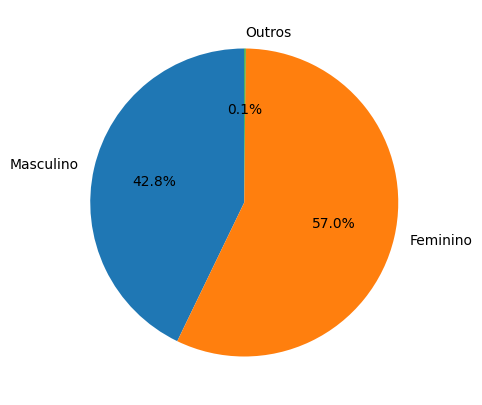

In [75]:
qtdmasculino = dt[masculino_total].count()[0]
qtdfeminino = dt[feminino_total].count()[0]
qtdoutros = dt[outros_total].count()[0]
valores = [qtdmasculino, qtdfeminino, qtdoutros]
rotulos = ['Masculino', 'Feminino', 'Outros']

plt.figure(figsize=(7,5))
plt.pie(x=valores, labels=rotulos, autopct='%1.1f%%', startangle=90)
plt.show()


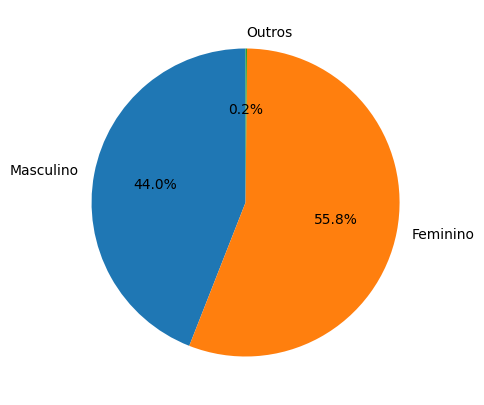

In [76]:
qtdmasculino = dt[masculino_1dose].count()[0]
qtdfeminino = dt[feminino_1dose].count()[0]
qtdoutros = dt[outros_1dose].count()[0]
valores = [qtdmasculino, qtdfeminino, qtdoutros]
rotulos = ['Masculino', 'Feminino', 'Outros']

plt.figure(figsize=(7,5))
plt.pie(x=valores, labels=rotulos, autopct='%1.1f%%', startangle=90)
plt.show()
